In [21]:
#IMPORTS
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
from PIL import Image
import six
from io import StringIO
import imageio

In [22]:
#Image name you want to do color quantization
image_name="img2.jpg"
display.HTML('<img src="{}" height=20px style="height: 400px;">'.format(image_name)) #To display the image

In [23]:
#To load the image as an numpy array
image = imageio.imread(image_name)
print(image.shape)

(400, 500, 3)


In [24]:
# Seperating width height and no. of channels
w, h, d = original_shape = tuple(image.shape)
print("Widht:",w)
print("Height:",h)
print("Channels/Dimension:",d)
print("Each channel for RGB and Range is [0 -255]")
print("If each channel required 1 byte of space which means 3 bytes for each pixel")
print("\nThen for whole image it will require {} x {} x {} = {} bytes".format(w,h,d,w*h*d))
print("Which comes around {} Mb".format((w*h*d)/(10000000)))

Widht: 400
Height: 500
Channels/Dimension: 3
Each channel for RGB and Range is [0 -255]
If each channel required 1 byte of space which means 3 bytes for each pixel

Then for whole image it will require 400 x 500 x 3 = 600000 bytes
Which comes around 0.06 Mb


In [25]:
#Transform image to a 2D numpy array.
image = np.array(image, dtype=np.float64) / 255
image_array = np.reshape(image, (w * h, d))
print(image_array)
print(image_array.shape)

[[0.68627451 0.51372549 0.4627451 ]
 [0.68627451 0.51372549 0.4627451 ]
 [0.68235294 0.50980392 0.45882353]
 ...
 [0.64313725 0.71764706 0.74509804]
 [0.64313725 0.71764706 0.74509804]
 [0.64313725 0.71764706 0.74509804]]
(200000, 3)


In [26]:
color2 = 2
color4 = 4
color8 = 8
color16 = 16
 
image_array_sample = shuffle(image_array, random_state=0)[:1000]

In [27]:
kmeans2 = KMeans(n_clusters=color2, random_state=0)
knnsample2 = kmeans2.fit(image_array_sample)

# Get labels for all points
labels2 = kmeans2.predict(image_array)

kmeans4 = KMeans(n_clusters=color4, random_state=0)
knnsample4 = kmeans4.fit(image_array_sample)

# Get labels for all points
labels4 = kmeans4.predict(image_array)

kmeans8 = KMeans(n_clusters=color8, random_state=0)
knnsample8 = kmeans8.fit(image_array_sample)

# Get labels for all points
labels8 = kmeans8.predict(image_array)

kmeans16 = KMeans(n_clusters=color16, random_state=0)
knnsample16 = kmeans16.fit(image_array_sample)

# Get labels for all points
labels16 = kmeans16.predict(image_array)

In [28]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    #For each pixel setting the color of its nearest cluster mean
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image



# Imagem Original

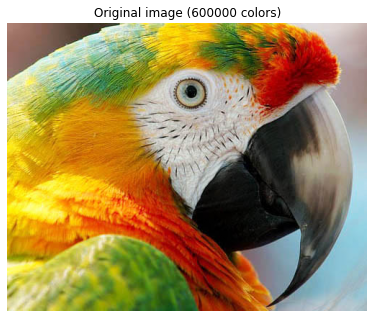

In [29]:
# Displaying original image
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
s= "Original image ("+(str)(w*h*d)+" colors)"
plt.title(s)
plt.imshow(image)

# Duas cores

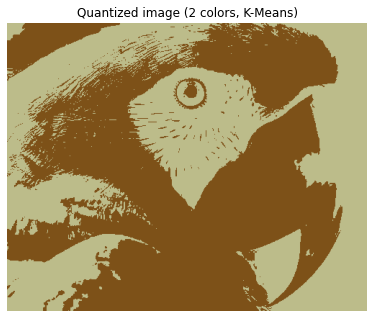

In [30]:
#Displaying Image using k-means with 64 colors
plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (2 colors, K-Means)')
plt.imshow(recreate_image(kmeans2.cluster_centers_, labels2, w, h))

# Quatro cores

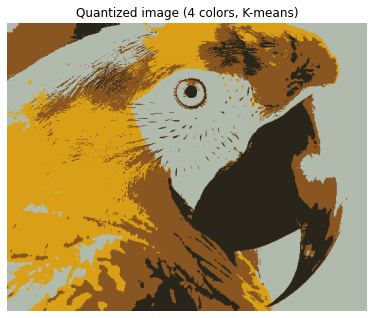

In [31]:
#Displaying Image using Random Algorithm top 1000 elements
plt.figure(3)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (4 colors, K-means)')
plt.imshow(recreate_image(kmeans4.cluster_centers_, labels4, w, h))

# Oito cores

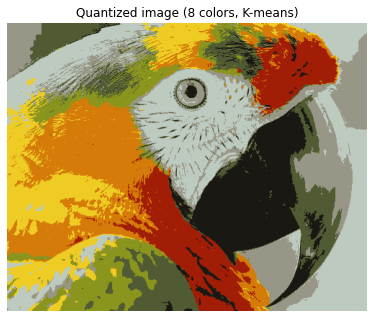

In [32]:
#Displaying Image using Random Algorithm whole array
plt.figure(4)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (8 colors, K-means)')
plt.imshow(recreate_image(kmeans8.cluster_centers_, labels8, w, h))
plt.show()


# Dezesseis cores

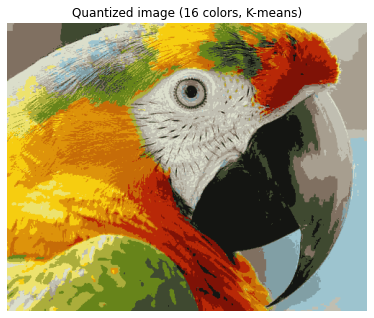

In [33]:
#Displaying Image using Random Algorithm whole array
plt.figure(4)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (16 colors, K-means)')
plt.imshow(recreate_image(kmeans16.cluster_centers_, labels16, w, h))
plt.show()

# O tamanho da imagem original é 400 x 500 x 8 x 3 = 4800000 bits. A imagem que utiliza 2 cores terá o tamanho de 400 x 500 x 1 = 200000 bits, a imagem que utiliza 4 cores terá o tamanho de 400 x 500 x 2 = 400000 bits, a imagem que utiliza 8 cores terá o tamanho de 400 x 500 x 3 = 600000 bits e por fim, a imagem que utiliza 16 cores terá o tamanho de 400 x 500 x 4 = 800000 bits.